In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from functools import partial
from IPython.display import HTML, display

# Magic code from StackExchange that makes mpl animations go in CoLab
from matplotlib import rc
rc('animation', html='jshtml')

In [2]:
# setup parameters
screen_width = 0.08  # (m)
screen_y = 1.5  # distance from mask (m)
y_laser = -0.08  # distance from mask to laser (m)

# mask parameters
N = 15  # number of slits
a = 0.04  # slit width (mm)
a *= 1E-3
d = 0.12  # slit spacing (N>1) (center-to-center mm)
d *= 1E-3

# laser parameters
wavelength = 635  # (nm)
wavelength *= 1E-9

# render parameters
enhance = True  # enhance dim light
hi_res = False  # high resolution
no_screen = False  # only show intensity along z=0 line on screen

num_points = 1_000
if hi_res:
    num_points = 10_000

# num_points = 2
# screen_y = 0.001

np.random.seed(1)
# screen_width = 0.008
# wavelength *= 0.01

In [3]:
# progress bar
def progress(value, max=100):
  return HTML(f"""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """)

In [4]:
class mask:
  def __init__(self):
    self.holes = []
    self.points = []


  def add_hole(self, hole):
    self.holes.append(hole)


  def area_holes(self):
    area = 0
    for hole in self.holes:
      if hole['type'] is 'slit':
        area += hole['w']*hole['h']
      if hole['type'] is 'circular':
        area += math.pi*hole['radius']**2
    return area


  def process_slit(self, hole, area_holes, num_points):
    r = hole['r']
    w = hole['w']
    h = hole['h']
    num_points = int(num_points * hole['w']*hole['h'] / area_holes)
    for i in range(num_points):
      this_x = np.random.uniform(-w/2, w/2)
      this_z = np.random.uniform(-h/2, h/2)
      self.points.append((r[0] + this_x, r[1], r[2] + this_z))


  def process_circular(self, hole, area_holes, num_points):
    r = hole['r']
    radius = hole['radius']
    num_points = int(num_points * math.pi * radius**2 / area_holes)
    for i in range(num_points):
      this_r = np.sqrt(np.random.uniform(0, radius**2))
      this_theta = np.random.uniform(0, 2*math.pi)
      this_x = this_r*np.cos(this_theta)
      this_z = this_r*np.sin(this_theta)
      self.points.append((r[0] + this_x, r[1], r[2] + this_z))


  def plot_points(self, num_points):
    area_holes = self.area_holes()
    for hole in self.holes:
      if hole['type'] is 'slit':
        self.process_slit(hole, area_holes, num_points)
      if hole['type'] is 'circular':
        self.process_circular(hole, area_holes, num_points)
    x = [i[0] for i in self.points]
    z = [i[2] for i in self.points]

    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    fig.tight_layout()
    ax.set_ylabel("z-position (m)")
    z_max = np.max(z)
    ax.set_ylim(-z_max*1.1, z_max*1.1)
    x_max = np.max(x)
    ax.set_xlabel("x-position (m)")
    ax.set_xlim(-x_max*1.1, x_max*1.1)
    ax.scatter(x, z)

    return np.array(self.points)

    # return self.points

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/gb/6y78pck94939p6dhylx6kb8h0000gp/T/ipykernel_51347/1705189802.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hole['type'] is 'slit':
/var/folders/gb/6y78pck94939p6dhylx6kb8h0000gp/T/ipykernel_51347/1705189802.py:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hole['type'] is 'circular':
/var/folders/gb/6y78pck94939p6dhylx6kb8h0000gp/T/ipykernel_51347/1705189802.py:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hole['type'] is 'slit':

In [5]:
mask = mask()

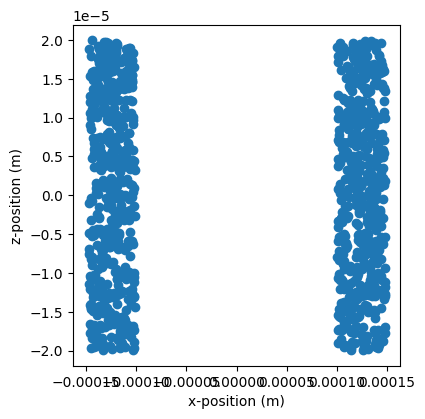

In [6]:

###################################################################
######################### Code to look at #########################
###################################################################


###################################################################
### Section 1
# Many slits
# left_slit_x = -(N-1)/2*d
# for slit in range(N):
#   slit_x = left_slit_x + slit*d
#   #a_new = np.random.uniform(a/2, a)
#   hole = {'type':'slit', 'r':[slit_x, 0, 0], 'w':a, 'h':2E-3}
#   mask.add_hole(hole)

# hole = {'type':'slit', 'r':[1E-2, 0, 0], 'w':1E-3, 'h':a}
# hole2 = {'type':'slit', 'r':[-1E-2, 0, 0], 'w':1E-3, 'h':a}


hole = {'type':'slit', 'r':[0.1245E-3, 0, 0], 'w':0.048E-3, 'h':a}
hole2 = {'type':'slit', 'r':[-0.1245E-3, 0, 0], 'w':0.046E-3, 'h':a}

mask.add_hole(hole)
mask.add_hole(hole2)

# for i in range(225):
#   this_x = np.random.uniform(-1.25E-3, 1.25E-3)
#   this_z = np.random.uniform(-1.25E-3, 1.25E-3)
#   hole = {'type':'circular', 'r':[this_x, 0, this_z], 'radius':0.03E-3}
#   mask.add_hole(hole)


# Gets random points sampled from within mask and plots them
r_sources = mask.plot_points(num_points)

In [7]:
###################################################################
### Section 2
def calc_distance(r1, r2):
  """
  Calculates distance between two points in 3D.
  """
#   print(r1)
#   print(r2)
#   return np.linalg.norm(r1 - r2, axis=1)
  distance = np.sqrt((r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2)
  return distance


###################################################################
### Section 3
def calc_phase_source(r_source, wavelength):
  """
  Calculates phase at source in mask.
  """
  # Phase at laser changes by 2pi over an x distance of 0.1 mm
  phase_laser = 2*np.pi*r_source[0]/0.1E-3

  # Distance from laser to source in mask
  r_laser = [r_source[0], -0.1, r_source[2]]
  dist = calc_distance(r_laser, r_source)

  # Phase at source
  phase_source = phase_laser + 2*np.pi*dist/wavelength

  return phase_source


###################################################################
### Section 4
def calc_phasor(r_source, r_points, wavelength):
  """
  Calculates phasor at screen.
  """
  # Distance from point source to points on screen
  dist = calc_distance(r_source, r_points)
#   print(dist)

  # Phase at screen
  phase = 0
  #phase += calc_phase_source(r_source, wavelength)
  phase += 2*np.pi*dist/wavelength

#   print(phase[0])

  # Phasor components
  phasor_x = np.cos(phase)
  phasor_y = np.sin(phase)

  return phasor_x, phasor_y


###################################################################
### Section 5
def add_phasors(r_sources, r_points, wavelength):
  """
  Adds phasors from multiple points of light within mask
  """
  # Initalize total phasor to zero
  # these get turned into numpy arrays
  total_phasor_x = 0
  total_phasor_y = 0

  # Loop over all points in the mask
  for i, r_source in enumerate(r_sources):
    # Phasor x and y component at screen due to point source
    phasor_x, phasor_y = calc_phasor(r_source, r_points, wavelength)

    # Add phasor from this point to the total phasor
    total_phasor_x += phasor_x
    total_phasor_y += phasor_y


    progbar.update(progress(i+1, len(r_sources)))

  total_phasor_x /= len(r_sources)
  total_phasor_y /= len(r_sources)

  return total_phasor_x, total_phasor_y


###################################################################
### Section 6
# Create points on screen to calculate phase at
if no_screen:
  x_range = np.linspace(-screen_width/2, screen_width/2, 10000)
  r_points = [x_range, screen_y, 0]
else:
  resolution = 100
  if hi_res:
    resolution = 200
  x_range = np.linspace(-screen_width/2, screen_width/2, resolution)
  z_range = np.linspace(-screen_width/2, screen_width/2, resolution)
  x_points, z_points = np.meshgrid(x_range, z_range)
  r_points = np.array([x_points, x_points * 0.0 + screen_y, z_points])
  print(np.shape(r_sources))
  print(np.shape(r_points))
#   r_points = [x_points, screen_y, z_points]




# Calculate total phasor at points
# Init progress bar
progbar = display(progress(0, len(r_sources)), display_id=True)
print('Adding phasors')
phasor_x, phasor_y = add_phasors(r_sources, r_points, wavelength)
print(phasor_x)
phasor_mag = np.sqrt(phasor_x**2 + phasor_y**2)
print(phasor_mag)

(999, 3)
(3, 100, 100)


Adding phasors
[[ 0.02016381  0.00100609 -0.0016428  ... -0.02076595 -0.01512692
   0.00195099]
 [-0.01801785 -0.00820574 -0.00788406 ...  0.01904953  0.01516272
  -0.00891713]
 [-0.01799544  0.00402089  0.01179795 ...  0.01988941  0.01504044
  -0.00022927]
 ...
 [ 0.00491933 -0.00068021  0.02145454 ...  0.00600355  0.01662788
  -0.01424757]
 [ 0.0135475  -0.01210959  0.01484569 ...  0.01961072  0.01284016
  -0.00168617]
 [-0.00905938  0.00596308 -0.01963777 ... -0.00967192 -0.01453575
   0.00911793]]
[[0.02027297 0.01606443 0.0256321  ... 0.02088309 0.01530692 0.01263865]
 [0.01948064 0.01709833 0.02566011 ... 0.02076653 0.01588827 0.01433398]
 [0.01868689 0.01813509 0.02579279 ... 0.02046453 0.01637267 0.01602277]
 ...
 [0.01704667 0.01772134 0.02146125 ... 0.02522579 0.01672377 0.01862662]
 [0.01530704 0.01722281 0.02177571 ... 0.02511783 0.01575063 0.01948329]
 [0.01354581 0.01661716 0.02190161 ... 0.02511626 0.01478622 0.02031966]]


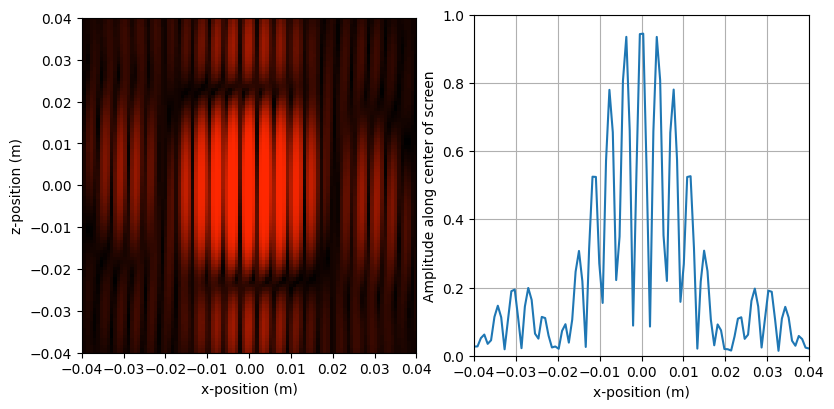

In [8]:
def create_colormap(wavelength):
  global enhance
  rgb = wavelength_to_rgb(wavelength)
  newcolors = []
  for i in range(256):
    intensity = i/256
    if enhance:
      intensity = 1 - math.pow(1-i/256, 4)
    newcolors.append(np.array(rgb)*intensity)
  return colors.ListedColormap(newcolors)


def wavelength_to_rgb(wavelength):
  rgb = [0.0, 0.0, 0.0]
  w = wavelength/1E-9
  if w < 380:
      rgb = [1,0,1]
  elif  w>= 380 and w < 440:
      rgb = [-(w - 440.) / (440. - 380.), 0.0, 1.0]
  elif w >= 440 and w < 490:
      rgb = [0.0, (w - 440.) / (490. - 440.), 1.0]
  elif w >= 490 and w < 510:
      rgb = [0.0, 1.0, -(w - 510.) / (510. - 490.)]
  elif w >= 510 and w < 580:
      rgb = [(w - 510.) / (580. - 510.), 1.0, 0.0]
  elif w >= 580 and w < 645:
      rgb = [1.0, -(w - 645.) / (645. - 580.), 0.0]
  elif w >= 645 and w <= 780:
      rgb = [1.0, 0.0, 0.0]
  return rgb


if no_screen:
  fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
  ax2.set_ylabel("Amplitude along center of screen")
  ax2.set_ylim(0.0, 1.0)
  ax2.grid(True)
  ax2.set_xlabel("x-position (m)")
  ax2.set_xlim(-screen_width/2, screen_width/2)
  plot1D = ax2.plot(x_range, phasor_mag)[0]
else:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
  cmap = create_colormap(wavelength)
  fig.tight_layout()
  ax1.axis('square')
  ax1.set_ylabel("z-position (m)")
  ax1.set_ylim(-screen_width/2, screen_width/2)
  ax2.set_ylabel("Amplitude along center of screen")
  ax2.set_ylim(0.0, 1.0)
  ax1.set_xlabel("x-position (m)")
  ax1.set_xlim(-screen_width/2, screen_width/2)
  ax2.grid(True)
  ax2.set_xlabel("x-position (m)")
  ax2.set_xlim(-screen_width/2, screen_width/2)
  #phasor_mag = np.multiply(phasor_mag, phasor_mag>(4.604/np.sqrt(2*num_points)))
  plot2D = ax1.pcolor(x_points, z_points, phasor_mag, cmap=cmap, vmin=0, vmax=1)
  plot1D = ax2.plot(x_range, phasor_mag[int(resolution/2)])[0]

In [9]:
# given an array of source vectors, calculates phasor at target vector location
# sources:    np.ndarray [ [v1], [v2], ...]
# target:     np.ndarray [vt]
# wavelength: float
def phasor_at(sources, target, wavelength):
    displacements = target - sources
    distances = np.linalg.norm(displacements, axis=1)
    # print(np.shape(distances))
    phases = 2 * np.pi * distances / wavelength
    # phases = np.mod(phases, 2 * np.pi)
    # todo: vary initial phases
    # print(phases[0])
    phasor_x = np.sum(np.cos(phases))
    phasor_y = np.sum(np.sin(phases))
    return phasor_x, phasor_y

# finds phasors for all targets given source locations
def add_phasors(sources, targets, wavelength):
    # target_phasors = np.ndarray((len(targets),2))
    target_phasor_x = np.zeros(len(targets))
    target_phasor_y = np.zeros(len(targets))

    for i in range(len(targets)):
        target = targets[i]
        tx, ty = phasor_at(sources, target, wavelength)
        target_phasor_x[i] = tx
        target_phasor_y[i] = ty
    
    target_phasor_x /= len(sources)
    target_phasor_y /= len(sources)

    return target_phasor_x, target_phasor_y

In [10]:
resolution = 100

x_range = np.linspace(-screen_width/2, screen_width/2, resolution)
z_range = np.linspace(-screen_width/2, screen_width/2, resolution)
x_points, z_points = np.meshgrid(x_range, z_range)
# targets = np.array([x_points, x_points * 0.0 + screen_y, z_points])

resolution_1d = resolution ** 2
x_1d = np.reshape(x_points, (resolution_1d,))
z_1d = np.reshape(z_points, (resolution_1d,))
y_1d = np.full((resolution_1d,), screen_y)

targets = np.zeros((resolution_1d, 3))
targets[:, 0] = x_1d
targets[:, 1] = y_1d
targets[:, 2] = z_1d

print(np.shape(targets))
print(np.shape(r_sources))

(10000, 3)
(999, 3)


In [11]:
tpx, tpy = add_phasors(r_sources, targets, wavelength)
print(tpx)
tpmag = np.sqrt(tpx**2 + tpy**2)
tpmag = np.reshape(tpmag, (resolution, resolution))
print(tpmag)

[ 0.02016381  0.00100609 -0.0016428  ... -0.00967192 -0.01453575
  0.00911793]
[[0.02027297 0.01606443 0.0256321  ... 0.02088309 0.01530692 0.01263865]
 [0.01948064 0.01709833 0.02566011 ... 0.02076653 0.01588827 0.01433398]
 [0.01868689 0.01813509 0.02579279 ... 0.02046453 0.01637267 0.01602277]
 ...
 [0.01704667 0.01772134 0.02146125 ... 0.02522579 0.01672377 0.01862662]
 [0.01530704 0.01722281 0.02177571 ... 0.02511783 0.01575063 0.01948329]
 [0.01354581 0.01661716 0.02190161 ... 0.02511626 0.01478622 0.02031966]]


In [12]:
np.finfo(np.double).precision
tpmag.dtype

dtype('float64')

In [13]:
print(np.shape(tpmag))
print(np.shape(phasor_mag))

(100, 100)
(100, 100)


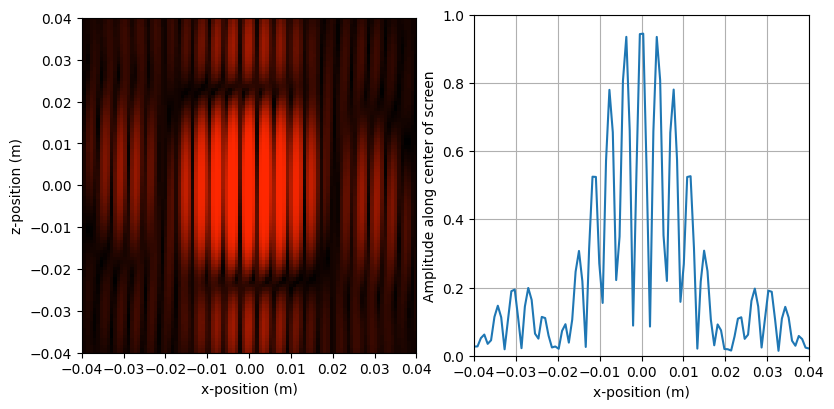

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
cmap = create_colormap(wavelength)
fig.tight_layout()
ax1.axis('square')
ax1.set_ylabel("z-position (m)")
ax1.set_ylim(-screen_width/2, screen_width/2)
ax2.set_ylabel("Amplitude along center of screen")
ax2.set_ylim(0.0, 1.0)
ax1.set_xlabel("x-position (m)")
ax1.set_xlim(-screen_width/2, screen_width/2)
ax2.grid(True)
ax2.set_xlabel("x-position (m)")
ax2.set_xlim(-screen_width/2, screen_width/2)
#phasor_mag = np.multiply(phasor_mag, phasor_mag>(4.604/np.sqrt(2*num_points)))
plot2D = ax1.pcolor(x_points, z_points, tpmag, cmap=cmap, vmin=0, vmax=1)
plot1D = ax2.plot(x_range, tpmag[int(resolution/2)])[0]

In [15]:
ts = np.array([[1, 2, 3], [4, 5, 6]])
tt = np.array([10, 20, 30])

phasor_at(ts, tt, 1)

(0.45290042904629235, -1.31112594980004)

In [16]:
test = np.array([[1, 2, 3], [4, 5, 6]])

test2 = np.array([10, 20, 30])

test + test2

array([[11, 22, 33],
       [14, 25, 36]])